# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Begin solutions
### Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import astroML.plotting as amplt 
import warnings


In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16.0, 5.0)

In [3]:
def hist_with_error(data,bins,density=True,**kwargs):
    rv,rb,rp = amplt.hist(data,bins=bins,histtype='step',density=density,label='data',**kwargs)
    oldcnt = rv*len(data)*np.diff(rb)
    area = np.sum(rv*len(data)*np.diff(rb)**2) if density else 1
    __ = plt.errorbar((rb[1:]+rb[:-1])/2,rv,yerr=np.sqrt(rv/area),fmt='. ',label='Error')
    return np.sum(np.diff(rb)*rv)

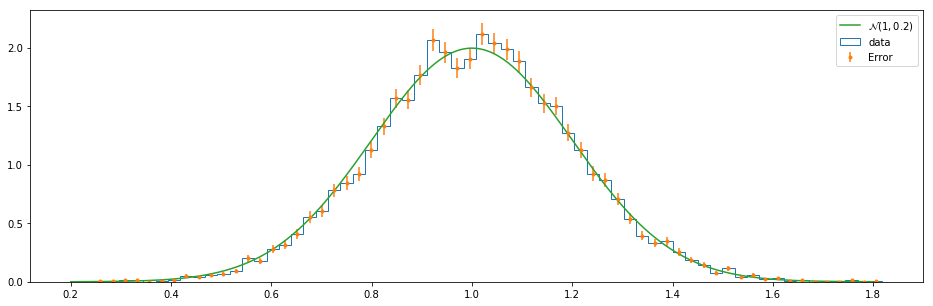

In [4]:
mu = 1;sigma = 0.2; llim = mu - 4*sigma; ulim = mu + 4*sigma
sample_size = 10_000
xvals = np.linspace(llim,ulim,sample_size)

norm_sample = sp.stats.norm(mu,sigma).rvs(sample_size)
norm_pdf = sp.stats.norm(mu,sigma).pdf(xvals)

area  = hist_with_error(norm_sample,bins='freedman',density=True) #density == normed python3
__ = plt.plot(xvals,norm_pdf*area,label=fr'$\mathcal{{N}}({mu},{sigma})$')
__ = plt.legend()

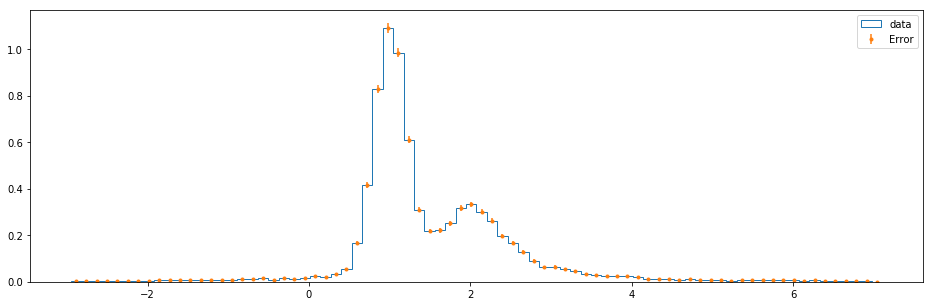

In [5]:
cmu = 2; gma = 0.5; sample_size = 10_000
cauchy_sample = sp.stats.cauchy.rvs(loc=cmu, scale=gma, size=sample_size)
joined_sample = np.concatenate([norm_sample,cauchy_sample])
__ = hist_with_error(joined_sample,bins='scott',range=(cmu-10*gma,cmu+10*gma))
__ = plt.legend()

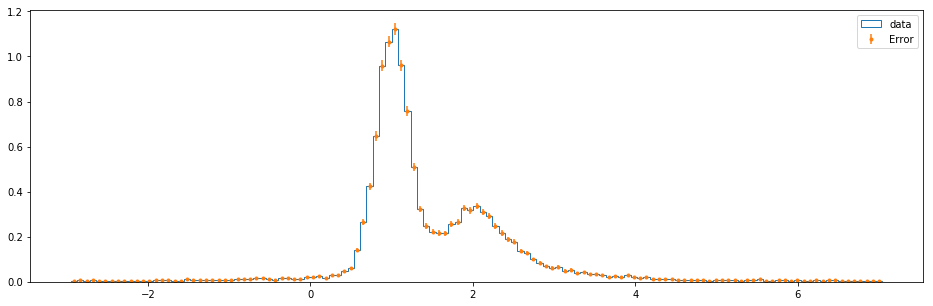

In [6]:
__ = hist_with_error(joined_sample,bins='freedman',range=(cmu-10*gma,cmu+10*gma))
__ = plt.legend()

## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

In [7]:
def fit_chi_sqr(samples,N=5,**kwargs):
    xval = np.linspace(0,N+15*np.log(N),samples)
    nors = sp.stats.norm(0,1).rvs(samples)
    sample_averages = [np.sum(np.random.choice(nors,N)**2) for i in range(samples)]
    chisq_pdf = 1/(2**(N/2)*sp.special.gamma(N/2))*xval**(N/2-1)*np.exp(-xval/2)
    amplt.hist(sample_averages,bins='freedman',density=True,alpha=0.5,label='data',**kwargs)
    __ = plt.plot(xval,chisq_pdf,label=r'$\chi^2$ PDF',**kwargs)
    __ = plt.legend()

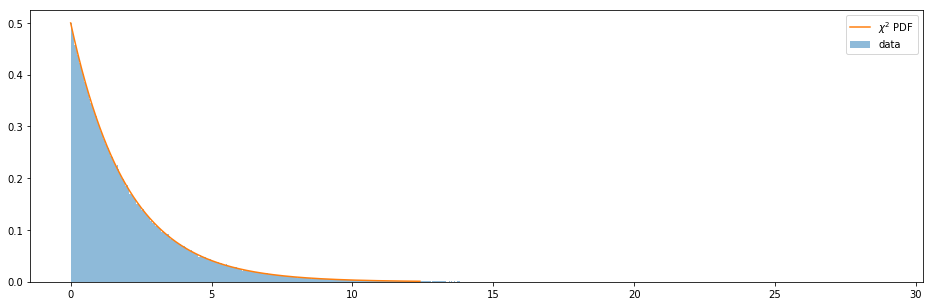

In [8]:
fit_chi_sqr(1_000_000,N=2)

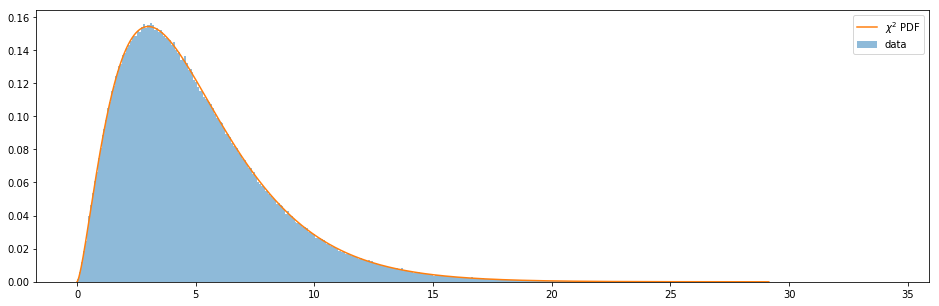

In [9]:
fit_chi_sqr(1_000_000,N=5)